# TXT and RTF Processing and Analysis
Copyright (C) 2021 ServiceNow, Inc.

This notebook handles the special-case processing of .txt and .rtf files in the GEOSCAN dataset. 
It also contains analysis of these files.

In [2]:
import pandas as pd

In [3]:
fname = 'rtf_filelist_assessment_121216.xlsx'

rtf_list = pd.read_excel(fname, engine='openpyxl')
rtf_list.head()

,Filename,Type,Useful
0,120470_readme_video_OF1230.rtf,Metadata,No
1,120474_OF1256_readme.rtf,Metadata,No
2,120596_readme_video_OF1298.rtf,Metadata,No
3,130474_readme_video_OF1740.rtf,Metadata,No
4,130603_readme_video_OF1979.rtf,Metadata,No


In [36]:
rtf_list.Useful.value_counts()

No     36
Yes     9
Name: Useful, dtype: int64

In [4]:
fname = 'txt_filelist_assessment_121216.xlsx'

txt_list = pd.read_excel(fname, engine='openpyxl')
txt_list.head()

,Filename,Type,Useful,Redundant
0,130913_CHEM.TXT,Table,No,None
1,130913_FIELD.TXT,Table,No,None
2,130913_INTRO.TXT,Intro with tables/legends and refs,Yes,None
3,133235_OF_2479.txt,Directions,No,None
4,133235_YKPLUTON.TXT,Intro with tables/legends and refs,Yes,None


In [6]:
txt_list.Useful.value_counts()

(45, 3)

## Document content analysis

### Reading the rtfs

In [40]:
from striprtf.striprtf import rtf_to_text

texts = []
for irow, row in rtf_list[rtf_list.Useful.str.strip() == 'Yes'].iterrows():
    with open(f"/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/{row.Filename}", 'r') as f:
        data = f.read()
        
    text2 = rtf_to_text(data)
    texts.append(text2)

        

In [117]:
texts

['Kurita, H. and Uchida, T., 1999: Dinoflagellate cysts from the JAPEX/JNOC/GSC Mallik 2L-38 gas hydrate research well; in Scientific Results from JAPEX/JNOC/GSC Mallik 2L-38 Gas Hydrate Research Well, Mackenzie Delta, Northwest Territories, Canada, (ed.) S. R. Dallimore, T. Uchida, and T. S. Collett; Geological Survey of Canada, Bulletin 544.\n\n',
 'McNeil, D. H., 1999: Micropaleontology of the JAPEX/JNOC/GSC Mallik 2L-38 gas hydrate research well; in Scientific Results from JAPEX/JNOC/GSC Mallik 2L-38 Gas Hydrate Research Well, Mackenzie Delta, Northwest Territories, Canada, (ed.) S. R. Dallimore, T. Uchida, and T. S. Collett; Geological Survey of Canada, Bulletin 544.\n\n',
 'Lorenson, T. D., Whiticar, M., Waseda, A., Dallimore, S. R., and Collett, T. S., 1999: Gas composition and isotopic geochemistry of cuttings, core, and gas hydrate from the JAPEX/JNOC/GSC Mallik 2L-38 gas hydrate research well; in Scientific Results from JAPEX/JNOC/GSC Mallik 2L-38 Gas Hydrate Research Well, M

**analysis** There are few RTFs. These all use \n as the newline character. One contains a \x00 character.

In [53]:
rtf_list_useful = rtf_list[rtf_list.Useful.str.strip() == 'Yes']
rtf_list_useful['text'] = texts

<ipython-input-53-c8454567da70>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  rtf_list_useful['text'] = texts


In [109]:
rtf_list_useful.shape

(9, 4)

In [113]:
texts[7].split('\n')

['A plexiglass plate with 4 brass electrodes mounted 1.25 cm apart in a Wenner configuration was used for measuring galvanic resistivity.  A 300 Hz input signal at 0.3 mA and 3 mA was measured at the current electrodes and converted to resistivity.  The high and low current measurements at each station were averaged to yield “avg. Rho”, as reported in the results.  Erroneous measurements may result when there is poor electrode to sediment contact.',
 '']

### Reading the txts

In [56]:
texts_txts = []
for irow, row in txt_list[txt_list.Useful.str.strip() == 'Yes'].iterrows():
    #text = []
    import codecs
    with codecs.open(f"/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/{row.Filename}", encoding='latin-1') as f:
        data = f.read()

    texts_txts.append(data)
    #print(data)

In [57]:
texts_txts

['FILE INTRO.TXT INTRODUCTION TO BEAR-SLAVE DIGITAL OPEN FILE.\r\n\r\nPROJECT 720063   BEAR-SLAVE OPERATION   ALLAN, CAMERON AND DURHAM   1972.\r\n\r\nPROJECT TITLE: RECONNAISSANCE GEOCHEMISTRY USING\r\nLAKE SEDIMENTS AND WATERS OF A 36,000-SQUARE MILE\r\nAREA OF THE CANADIAN SHIELD.\r\n\r\nThe principal investigators were R.J.Allan, E.M. Cameron, and C.C. \r\nDurham.\r\n\r\nPilot study field work was done in 1971. The main field operation was done\r\nin 1972. Twenty-four raw data maps and a summary report were published\r\n(Allan et al. 1973).\r\n\r\nThe objectives were to test the feasibility of low sample density lake\r\nsediments-lake waters surveys as a method for systematic evaluation of the\r\nmineral potential of the northern Canadian Shield and to provide reference\r\ngeochemical data on the various geologic and tectonic domains of the\r\nshield. Parts of Bear-Slave Structural Provinces were chosen because of\r\nvaried geologic and tectonic terrains, undeveloped mineral potent

In [58]:
text_list_useful = txt_list[txt_list.Useful.str.strip() == 'Yes']
text_list_useful['text'] = texts_txts

<ipython-input-58-b3fd5fd14c5b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_list_useful['text'] = texts_txts


In [136]:
for x in texts_txts[0].split('\n'):
    print('-' + x)

-FILE INTRO.TXT INTRODUCTION TO BEAR-SLAVE DIGITAL OPEN FILE.
-
-PROJECT 720063   BEAR-SLAVE OPERATION   ALLAN, CAMERON AND DURHAM   1972.
-
-PROJECT TITLE: RECONNAISSANCE GEOCHEMISTRY USING
-LAKE SEDIMENTS AND WATERS OF A 36,000-SQUARE MILE
-AREA OF THE CANADIAN SHIELD.
-
-The principal investigators were R.J.Allan, E.M. Cameron, and C.C. 
-Durham.
-
-Pilot study field work was done in 1971. The main field operation was done
-in 1972. Twenty-four raw data maps and a summary report were published
-(Allan et al. 1973).
-
-The objectives were to test the feasibility of low sample density lake
-sediments-lake waters surveys as a method for systematic evaluation of the
-mineral potential of the northern Canadian Shield and to provide reference
-geochemical data on the various geologic and tectonic domains of the
-shield. Parts of Bear-Slave Structural Provinces were chosen because of
-varied geologic and tectonic terrains, undeveloped mineral potential,
-relative accessibility for mineral 

In [135]:
for x in texts_txts[2].split('\n'):
    print('-' + x)

-                  SCOTIAN SHELF MESOZOIC MAPPING PROJECT
-B.C. MACLEAN
-                        ATLANTIC GEOSCIENCE CENTRE
-
-Introduction:
-
-The Geological Survey of Canada at the Atlantic Geoscience Centre, Dartmouth, Nova Scotia undertook a 5 year project in 1984 to re-interpret the Mesozoic geology of Scotian Basin.  Since publication of a Scotian Basin synthesis almost ten years earlier by the G.S.C. (Jansa and Wade, 1975), a vast quantity of well and seismic information had been gathered by the petroleum industry and much of these data were available through the Halifax regional office of the Canada Oil and Gas Lands Administration (now the Canada-Nova Scotia Offshore Petroleum Board) and the Canada-Newfoundland Offshore Petroleum Board.
-
-The results of this study have been published in Volume 2 of the Geology of Canada Series, entitled: 'Geology of the Continental Margin of Eastern Canada' (Wade and MacLean, 1990).  They will also be presented in the Scotian Shelf and Grand 

**analysis** These documents contain \r\n as newline characters. Depending on the document, some have newlines according to a document's lines (linebreaks mid sentences), while some have newlines only at the end of paragraphs.

# Statistical analysis

Text(0.5, 1.0, 'Length of texts in characters')

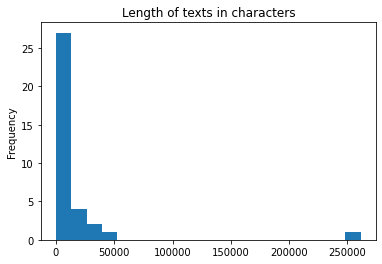

In [139]:
import matplotlib.pyplot as plt
text_list_useful.text.str.len().plot.hist(bins=20)
plt.title('Length of texts in characters')

Text(0.5, 1.0, 'Length of texts in words (simple space tokenization)')

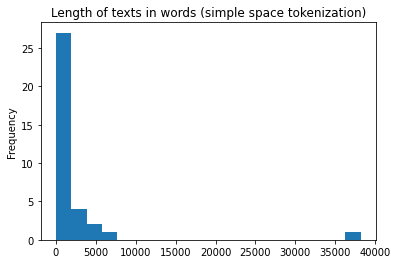

In [140]:
text_list_useful.text.str.split().str.len().plot.hist(bins=20)
plt.title('Length of texts in words (simple space tokenization)')

In [142]:
print(f'Total number of words {text_list_useful.text.str.split().str.len().sum()}')

Total number of words 71313


Text(0.5, 1.0, 'Length of texts in lines')

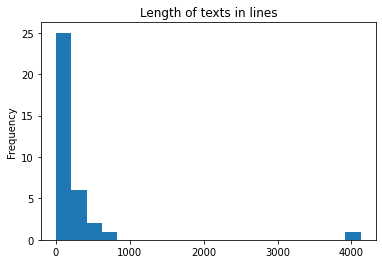

In [141]:
text_list_useful.text.str.split('\n').str.len().plot.hist(bins=20)
plt.title('Length of texts in lines')

In [91]:
import re
text_list_useful['text_split'] = text_list_useful.text.str.split('\r\n') # + '\n' #apply(lambda x: re.split(r'(\r\n)', x))#str.split(r'(\r\n)')

<ipython-input-91-ef0a6b99e629>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  text_list_useful['text_split'] = text_list_useful.text.str.split('\r\n') # + '\n' #apply(lambda x: re.split(r'(\r\n)', x))#str.split(r'(\r\n)')


In [93]:
text_list_useful_split = text_list_useful.explode('text_split') + '\n'# = text_list_useful['text_split'] + '\n'

In [96]:
text_list_useful_split['file'] = f'/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/' + text_list_useful_split['Filename']
text_list_useful_split['text'] = text_list_useful_split['text_split']
#text_list_useful_split[['file', '']]

text_list_useful_split[['file', 'text']]

,file,text
2,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...,FILE INTRO.TXT INTRODUCTION TO BEAR-SLAVE DIGI...
2,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...,\n
2,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...,"PROJECT 720063 BEAR-SLAVE OPERATION ALLAN,..."
2,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...,\n
2,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...,PROJECT TITLE: RECONNAISSANCE GEOCHEMISTRY USI...
...,...,...
153,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...,Jurassic SH 3006\n
153,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...,Mount Head Fm. 3054\n
153,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...,Turner Valley Fm. 3080\n
153,/nrcan_p2/data/01_raw/20201117/geoscan/raw/ext...,Shunda Fm. 3183\n


# Write txt to file

In [146]:
import codecs
import numpy as np
import tqdm

df = txt_list[txt_list.Useful.str.strip() == 'Yes']
for irow, row in tqdm.tqdm(df.iterrows(), total=df.shape[0]):
    #text = []
    
    newfilename = pathlib.Path(row.Filename).stem + '.csv'
    with codecs.open(f"/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/{row.Filename}", encoding='latin-1') as f:
        data = f.read()
        
    data = data.split('\r\n')
    newdata = pd.DataFrame({'text': data})
    newdata['text'] = newdata['text'] + "\n"                           
    newdata['file'] = f"/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/txt/{row.Filename}"
    newdata['obj_type'] = np.nan
    newdata['pg'] = np.nan
    newdata['pos_x0'] = np.nan
    newdata['pos_y0'] = np.nan
    newdata['pos_x1'] = np.nan
    newdata['pos_y1'] = np.nan
    #display(newdata)
    
    outputfile = f"/nrcan_p2/data/02_intermediate/20201117/geoscan/txt/{newfilename}"
    newdata = newdata[['obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1', 'text', 'file']]
    newdata.to_csv(outputfile)
    #break
    

    #texts_txts.append(data)

100%|██████████| 35/35 [00:00<00:00, 86.92it/s]


# Write rtf to file

In [145]:
import numpy as np
import tqdm
import pathlib

df = rtf_list[rtf_list.Useful.str.strip() == 'Yes']
for irow, row in tqdm.tqdm(df.iterrows(), total=df.shape[0]):
    #text = []
    
    newfilename = pathlib.Path(row.Filename).stem + '.csv'
    with codecs.open(f"/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/{row.Filename}") as f:
        data = f.read()
        
    data = rtf_to_text(data)
    data = data.split('\n')
    newdata = pd.DataFrame({'text': data})
    newdata['text'] = newdata['text'] + "\n"                           
    newdata['file'] = f"/nrcan_p2/data/01_raw/20201117/geoscan/raw/extracted/wp_rtf/{row.Filename}"
    newdata['obj_type'] = np.nan
    newdata['pg'] = np.nan
    newdata['pos_x0'] = np.nan
    newdata['pos_y0'] = np.nan
    newdata['pos_x1'] = np.nan
    newdata['pos_y1'] = np.nan
    #display(newdata)
    
    outputfile = f"/nrcan_p2/data/02_intermediate/20201117/geoscan/wp_rtf/{newfilename}"
    newdata = newdata[['obj_type', 'pg', 'pos_x0', 'pos_y0', 'pos_x1', 'pos_y1', 'text', 'file']]
    newdata.to_csv(outputfile)
    #break
    

100%|██████████| 9/9 [00:00<00:00, 106.59it/s]
